In [13]:
#import the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
#Read the csv file
strokedata = pd.read_csv('stroke.csv')
strokedata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669.0,Male,3,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468.0,Male,58,1,0,Yes,Private,Urban,255.00,39.2,never smoked,1
2,56543.0,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
3,NaN,Female,52,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
4,41413.0,Female,75,0,1,Yes,Self-employed,Rural,103.00,27.0,never smoked,0


In [15]:
#delete redundant columns
strokedata = strokedata.drop('id', axis=1)

In [16]:
#Examine the dataset
print(strokedata.columns)
print(strokedata.shape)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
(29073, 11)


In [17]:
strokedata.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,29073.000000,29073.000000,29073.000000,29073.000000,29073.000000,29073.000000
mean,47.670209,0.111478,0.129433,115.907356,29.585285,0.171706
std,18.736000,0.314729,0.335684,56.764586,8.356899,0.377131
min,3.000000,0.000000,0.000000,55.010000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,80.360000,25.000000,0.000000
50%,48.000000,0.000000,0.000000,98.500000,28.900000,0.000000
75%,62.000000,0.000000,0.000000,118.000000,33.900000,0.000000
max,82.000000,1.000000,1.000000,281.590000,92.000000,1.000000


In [18]:
#Convert X & Y variable to a categorical variable as relevant
strokedata.stroke = strokedata.stroke.astype('category')
strokedata.hypertension = strokedata.hypertension.astype('category')
strokedata.heart_disease = strokedata.heart_disease.astype('category')

In [19]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = strokedata.stroke.value_counts(normalize=True)
print(prop_Y)

0    0.828294
1    0.171706
Name: stroke, dtype: float64


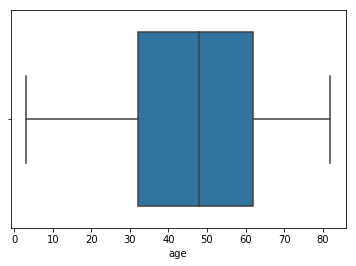

In [20]:
sns.boxplot(strokedata.age)

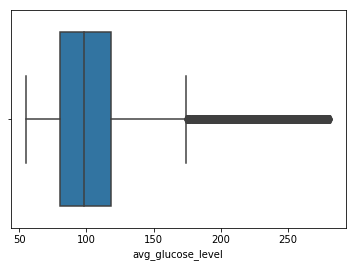

In [21]:
sns.boxplot(strokedata.avg_glucose_level)

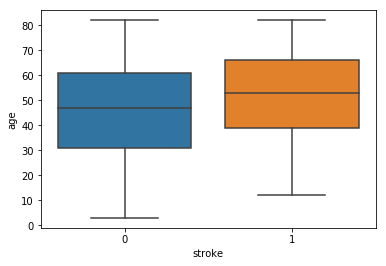

In [22]:
sns.boxplot(data=strokedata, x='stroke', y='age')

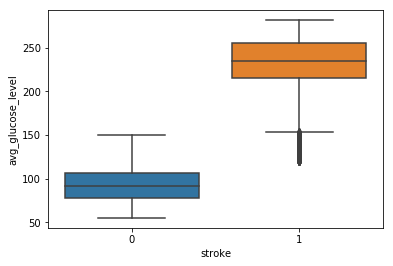

In [23]:
sns.boxplot(data=strokedata, x='stroke', y='avg_glucose_level')   # Here, the median values are different,which means 
                                                                  #  it can be a better parameter to analyse stroke rate

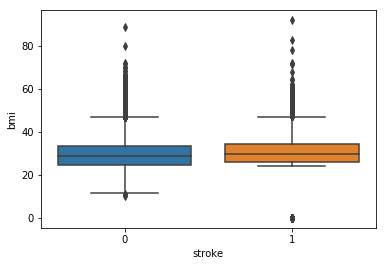

In [24]:
sns.boxplot(data=strokedata, x='stroke', y='bmi')

In [25]:
#Stacked barplot for categorical variables
table_heart=pd.crosstab(strokedata.heart_disease,strokedata.stroke)
print(table_heart)

stroke             0     1
heart_disease             
0              23018  2292
1               1063  2700


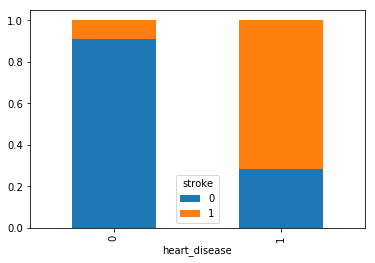

In [26]:
tab = table_heart.div(table_heart.sum(1).astype(float), axis=0)
tab.plot(kind='bar', stacked=True)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

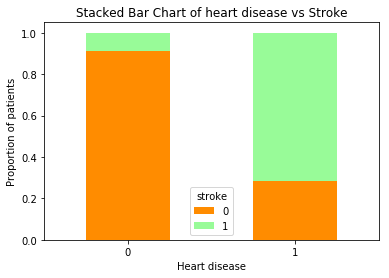

In [27]:
table_heart.div(table_heart.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['darkorange', 'palegreen'])
plt.title('Stacked Bar Chart of heart disease vs Stroke')
plt.xlabel('Heart disease')
plt.ylabel('Proportion of patients')
plt.xticks(rotation=0)

In [28]:
table_gender=pd.crosstab(strokedata.gender,strokedata.stroke)
print(table_gender)

stroke      0     1
gender             
Female  15002  2854
Male     9079  2138


Text(0.5, 1.0, 'gender vs stroke')

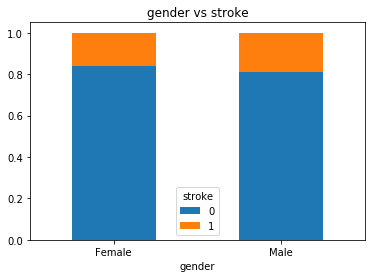

In [29]:
table_gender.div(table_gender.sum(1),axis=0).plot(kind='bar', stacked='True')
plt.xticks(rotation=0)
plt.title("gender vs stroke")

In [30]:
strokedata.work_type.unique()

array(['children', 'Private', 'Self-employed', 'Govt_job', 'Never_worked'],
      dtype=object)

In [31]:
strokedata.smoking_status.value_counts(normalize=True)

never smoked       0.541671
formerly smoked    0.244178
smokes             0.214151
Name: smoking_status, dtype: float64

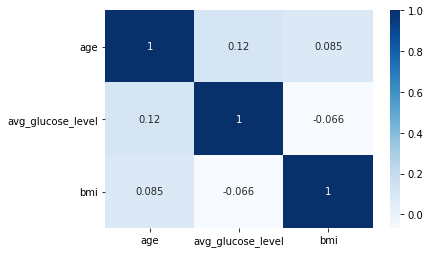

In [32]:
corr = strokedata[strokedata.columns].corr()
sns.heatmap(corr, annot = True,cmap='Blues')

## Model building

In [33]:
#Define X and Y variables
X = strokedata.drop('stroke', axis=1)
Y = strokedata[['stroke']]

In [34]:
#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [35]:
Y.head()

,stroke
0,0
1,1
2,0
3,0
4,0


In [36]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


In [37]:
#Build the logistic regression model          #On large datasets,statsmodel doesnt work , then use logit
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))       #If Optimization had not been  terminated, it would have 
lg = logit.fit() 

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.018438
         Iterations 16


In [38]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                20351
Model:                          Logit   Df Residuals:                    20336
Method:                           MLE   Df Model:                           14
Date:                Mon, 15 Jul 2019   Pseudo R-squ.:                  0.9600
Time:                        14:33:47   Log-Likelihood:                -375.23
converged:                       True   LL-Null:                       -9372.8
                                        LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -24.0621      1.328    -18.118      0.000     -26.665     -21.459
age                            -0.0072      0.007     -1.007      0.314      -0.

In [40]:
#Calculate Odds Ratio
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef
lgcoef.to_csv('logit.csv')

In [62]:
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)         # alpha here is 0.1 i.e 90% confidence in order to identify
                                                                      # borderline data
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]
#NUmerical Variable: for 1 unit increase in avg_glusoe level, odds ratio inceeases by 1.17 times
# Categorical variable: who smokes, have odds ratio to get stroke by 42.19 times  compared to one who doesnt smoke
#For odds_ration around 0.5, it is not possible to arrive at a inference

,coef,Odds_ratio,probability,pval
smoking_status_smokes,3.74,42.19,0.98,0.00
hypertension_1,3.10,22.26,0.96,0.00
heart_disease_1,2.94,18.99,0.95,0.00
avg_glucose_level,0.16,1.18,0.54,0.00
bmi,-0.07,0.93,0.48,0.00
work_type_Self-employed,-0.58,0.56,0.36,0.10
const,-24.06,0.00,0.00,0.00


## Predict for test data 

In [44]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
logreg.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[16800    31]
 [  116  3404]]


In [48]:
#Predict for test set
pred_test = logreg.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[7232   18]
 [  60 1412]]


In [49]:
#Function to visulise confusion matrix
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [0,1] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] , cmap="Greens")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

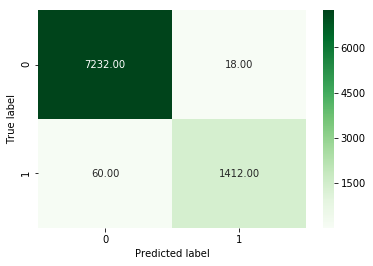

In [50]:
draw_cm(y_test, pred_test)

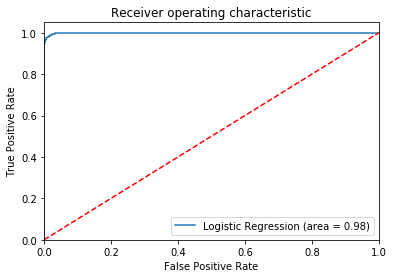

In [51]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [52]:
auc_score = metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
round( float( auc_score ), 2 )


1.0

In [53]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([4.13421867e-02, 4.78130777e-05, 8.59609861e-05, ...,
       9.99847650e-01, 9.33503641e-03, 1.86345701e-04])

Text(0, 0.5, 'Frequency')

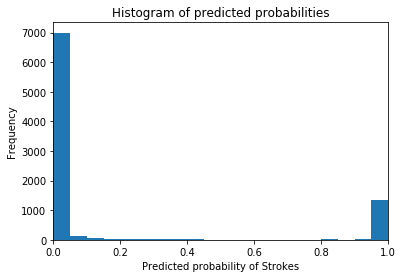

In [61]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=20)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Strokes')
plt.ylabel('Frequency')

In [55]:
pred_proba_df = pd.DataFrame(logreg.predict_proba(X_test))              #just predict will return 1's or 0's)
threshold_list = [0.05,0.06,0.08,0.1,0.2,0.3,0.4,0.5,.7,.75,.8]
for i in threshold_list:                                                # recall - senstivity
                                                                        # we choose that 'i' where FP=FN
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing recall is {:.2f}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing recall is 0.97
[[6993  257]
 [   4 1468]]

******** For i = 0.06 ******
Our testing recall is 0.97
[[7031  219]
 [   7 1465]]

******** For i = 0.08 ******
Our testing recall is 0.98
[[7088  162]
 [  15 1457]]

******** For i = 0.1 ******
Our testing recall is 0.98
[[7119  131]
 [  19 1453]]

******** For i = 0.2 ******
Our testing recall is 0.99

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()



[[7177   73]
 [  37 1435]]

******** For i = 0.3 ******
Our testing recall is 0.99
[[7203   47]
 [  45 1427]]

******** For i = 0.4 ******
Our testing recall is 0.99
[[7223   27]
 [  54 1418]]

******** For i = 0.5 ******
Our testing recall is 0.99
[[7232   18]
 [  60 1412]]

******** For i = 0.7 ******
Our testing recall is 0.99
[[7243    7]
 [  77 1395]]

******** For i = 0.75 ******
Our testing recall is 0.99
[[7244    6]
 [  80 1392]]

******** For i = 0.8 ******
Our testing recall is 0.99
[[7246    4]
 [  85 1387]]


In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix



In [57]:
y_scores = logreg.predict_proba(X_test)[:, 1]

In [58]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [59]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    
   

In [60]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

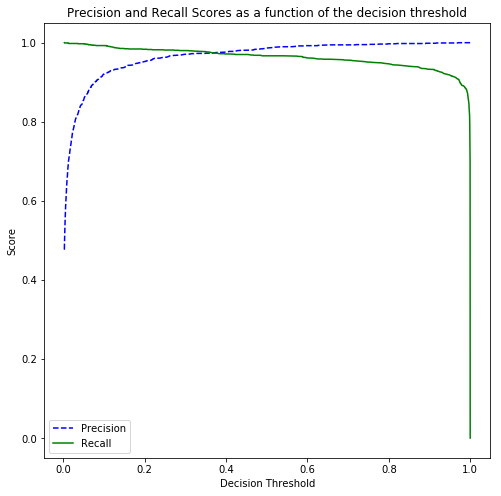

In [45]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)